**Performing SVM on the titanic dataset wherein wherein we have to predict if a particular person will survive the Titanic shipwreck given a set of features.**

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#### Reading Data 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Studying features of the data

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Correlation of age check 

<AxesSubplot:>

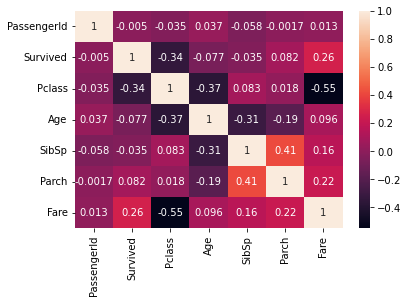

In [9]:
import seaborn as sns
sns.heatmap(train.corr(), annot = True)

#### Dealing with missing values of Age and Cabin in training and test set

1. **Age**:

It is not very accurate to replace the missing values of age with the mean or median. As such, looking at the correlation heatmap above, the 2 factors most associated with age is Pclass and SibSp. Hence, I would first differentiate our dataset by their social-economic status and number of siblings/spouses they are on board with. I would then use the median of each subset as the replacement for the respective missing values.

In [10]:
train_1=train.groupby(["Pclass","SibSp"])
train_1_median=train_1.median()
print(train_1_median)
test_1=test.groupby(["Pclass","SibSp"])
test_1_median=test_1.median()
print(test_1_median)

              PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.55

In [11]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()  #I used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

In [12]:
train["Age"]=train["Age"].fillna(fill_age(train,train_1_median))
test["Age"]=test["Age"].fillna(fill_age(train,test_1_median))

2. **Cabin:**

Since the cabin location would logically affect their ability to evacuate and survive, it is also not appropriate to assign the missing cabin values randomly. Instead, it's better we assign them Cabin U (U for unknown).

In [13]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
train["Cabin"]=train["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])
test["Cabin"]=test["Cabin"].fillna("U")
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [15]:
def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)  #Cabin U is when the rest of cabins are 0

In [16]:
new_cabin_features(train)
new_cabin_features(test)

In [17]:
test.isnull().sum()
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [18]:
X_train = train.drop(['Name','Cabin','Embarked','Ticket','Survived'], axis=1)
X_test = test.drop(['Name','Cabin','Embarked','Ticket',], axis=1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_train=(np.array(ct.fit_transform(X_train)))
#print(X_train)
X_test.fillna(X_test.mean())
X_test=(np.array(ct.fit_transform(X_test)))

Y_train=train["Survived"]

C:\Users\varu2\AppData\Local\Temp/ipykernel_13716/3239763100.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean())


### Model SVC Hyperparameter tuning using GridSearchCV

In [19]:
from sklearn.svm import SVC
#  using rbf 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': ["scale", "auto"], 'kernel': ['linear']}

  
model_svc = SVC(
    random_state= 42,
    class_weight="balanced",
    probability=True,
)
grid = GridSearchCV(model_svc, param_grid, refit = True, verbose = 3,cv=5,scoring='accuracy')
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

accuracy_score(Y_train, grid.predict(X_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.799 total time=  18.3s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.809 total time=  26.6s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.787 total time=  32.7s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.753 total time= 1.6min
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.787 total time= 1.2min
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.799 total time=  29.0s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.809 total time=  28.9s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.787 total time=  41.1s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.753 total time= 1.8min
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.787 total time=  58.6s
[CV 1/5] END ...C=1, gamma=scale, kernel=linear;, score=0.782 total time= 1.2min
[CV 2/5] END ...C=1, gamma=scale, kernel=linear;

0.7878787878787878

#### Accuracy on train set obtained = 0.7878

#### Printing the best parameters choosen

In [20]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)


### Prediction made

In [22]:
#X_test = X_test.fillna(lambda x: x.median())
grid_predictions = grid.predict(X_test)
print(grid_predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
